In [ ]:
import requests #Library standard making HTTP requests in Python
from bs4 import BeautifulSoup #library for colect data in site (webscrap)
from lxml import html


In [ ]:
from pickle import FALSE
url = ('https://nfce.fazenda.mg.gov.br/portalnfce/sistema/qrcode.xhtml?p=31220921414958002061650020002717541635629030|2|1|1|F65F4D3FFF05CA40C32C8936DCD8407F9414D361')

page = requests.get(url, verify = False).content
tree = html.fromstring(page)
dados = BeautifulSoup(page, 'html.parser') #content for html 

/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


In [ ]:
super_merc = dados.select("#formPrincipal\:content-template-consulta > div.container > table.table.text-center > thead > tr:nth-of-type(2) > th > h4 > b")
mercado = ([r.text.strip() for r in super_merc])
nome_mercado = " ".join(str(v) for v in mercado)


MAGLIONI RIBEIRO & CIA LTDA ( PRINCESA)


In [ ]:
count = 1
results = []
val_final =[]
type(results)
while True:
 
  valor = dados.select("#myTable > tr:nth-of-type("+ str(count) +") > td:nth-of-type(4)")
  results.append([r.text.split(' ')[4].strip() for r in valor])
  print(results[count - 1])
  res_valor = results[count - 1]
  val_prod = " ".join(str(v) for v in res_valor)
  val_prod = val_prod.replace("]", "")
  val_prod = val_prod.replace("[", "")
  val_prod = val_prod.replace(",", ".")
  val_final.append(val_prod)

  if results[count - 1] == []:
    val_final.pop(count - 1)
    break
  
  count = count + 1



['2,40']
['3,69']
['2,99']
['2,29']
['2,29']
['2,29']
['2,29']
['9,99']
[]


In [ ]:
codigo = []
cod_final = []
count2 = 1
while True:

  cod = tree.xpath('//*[@id="myTable"]/tr['+ str(count2)+']/td[1]/text()')
  codigo.append(i.split(" ")[1].strip() for i in cod) 
  res_codigo = codigo[count2 - 1]
  cod_prod = " ".join(str(v) for v in res_codigo)
  cod_prod = cod_prod.replace(",", "")
  cod_prod = cod_prod.replace(")", "")
  cod_prod = cod_prod.replace(" ", "")
  cod_prod = cod_prod.replace("'", "")
  cod_final.append(cod_prod)
  

  if cod_final[count2 - 1] == '':
    cod_final.pop(count2 - 1)
    break
  count2 = count2 + 1


In [ ]:
resultado = []
nome_final = []

count2 = 1
while True: 
  nomes = dados.select("#myTable > tr:nth-of-type("+ str(count2) +") > td:nth-of-type(1)")
  resultado.append([i.text.split(" ")[0:3] for i in nomes ])
  res = resultado[count2 - 1]
  nome_prod = " ".join(str(v) for v in res)
  nome_prod = nome_prod.replace(",", "")
  nome_prod = nome_prod.replace("]", "")
  nome_prod = nome_prod.replace("[", "")
  nome_prod = nome_prod.replace("'", "")
  nome_final.append(nome_prod)

  if resultado[count2 - 1] == []:
    nome_final.pop(count2 - 1)
    break
  count2 = count2 + 1



In [ ]:
count3 = 1
results_un = []
un_final =[]
while True:
 
  un = dados.select("#myTable > tr:nth-of-type("+ str(count3) +") > td:nth-of-type(3)")
  results_un.append([r.text.split(' ')[1].strip() for r in un])
  res_un = results_un[count3 - 1]
  un_prod = " ".join(str(v) for v in res_un)
  un_final.append(un_prod)

  if results_un[count3 - 1] == []:
    un_final.pop(count3 - 1)
    print(un_final[0])
    break
  
  count3 = count3 + 1


KG


In [ ]:
count4 = 1
results_qtd = []
qtd_final =[]
while True:
 
  qtd = dados.select("#myTable > tr:nth-of-type("+ str(count4) +") > td:nth-of-type(2)")
  results_qtd.append([r.text.split(' ')[4].strip() for r in qtd])
  res_qtd = results_qtd[count4 - 1]
  qtd_prod = " ".join(str(v) for v in res_qtd)
  qtd_final.append(qtd_prod)

  if results_qtd[count4 - 1] == []:
    qtd_final.pop(count4 - 1)
    print(qtd_final)
    break
  
  count4 = count4 + 1


['0.2000', '1.0000', '1.0000', '1.0000', '1.0000', '1.0000', '1.0000', '1.0000']


In [ ]:
count_calc = 0
result_calc = 0

while (count_calc + 1) <= len(qtd_final):
  if un_final[count_calc] == "KG":
    result_calc = float(val_final[count_calc]) / float(qtd_final[count_calc])
    result_calc = round(result_calc, 2)
    val_final[count_calc] = str(result_calc)
    print(val_final)
  count_calc = count_calc + 1

['12.0', '3.69', '2.99', '2.29', '2.29', '2.29', '2.29', '9.99']


In [ ]:
print("Nome do mercado: " + nome_mercado + "\n")
print("Nome produto: " + str(nome_final) + "\n")
print("Codigo de barras: " + str(cod_final) + "\n")
print("Unidade do produto: " + str (un_final) + "\n")
print("Valores total: " + str(val_final) + "\n")

Nome do mercado: MAGLIONI RIBEIRO & CIA LTDA ( PRINCESA)

Nome produto: ['PAO FRANCES ALVORADA', 'ESC. DENTAL ORAL', 'FITA DENTAL PREDENT', 'CR. DENTAL DENTIL', 'CE. DENTAL DENTIL', 'CR. DENTAL DENTIL', 'CE. DENTAL DENTIL', 'ROSCA RAINHA C/CREME']

Codigo de barras: ['3775', '225213', '131657', '256410', '249502', '256410', '249502', '4350']

Unidade do produto: ['KG', 'UN', 'UN', 'UN', 'UN', 'UN', 'UN', 'UN']

Valores total: ['12.0', '3.69', '2.99', '2.29', '2.29', '2.29', '2.29', '9.99']



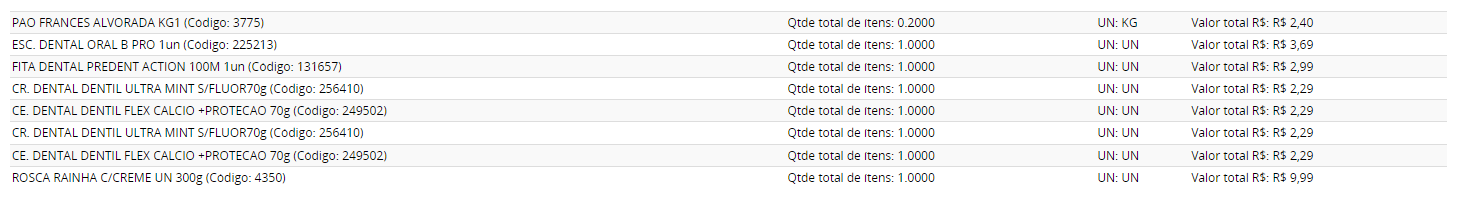